In [1]:
import sys
sys.path.insert(0, './network')

import learnrules as rules
import representations as rp
from ac_learn import ActorCriticLearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

In [3]:
ep_results = []
ep_rewards=[]
ep_values=[]
ep_rollmean = []
policy = []

tests = 1
n = 2
wait = 2
    
for test in range(tests):
    for attempt in range(5):
        try:
            out = ActorCriticLearn().run(env = 'MiniGrid',
                                         rep = rp.OneHotRep((8,8,4)),
                                         trials = 500,
                                         rule = rules.ActorCriticTDtheta,
                                         alpha = 0.1, 
                                         beta = 0.9, 
                                         gamma = 0.95, 
                                         lambd = None,
                                         n_neurons = 3000,
                                         sparsity = 0.1,
                                         n = n,
                                         continuous = False,
                                         theta = (0.001 * (n-1)),
                                         q = 50,
                                         verbose=False,
                                         seed = test,
                                         data_dir='.\data\debug', 
                                         data_format="npz")
            if test == 0:
                Results_df = pd.DataFrame([out])
            else:
                Results_df.loc[len(Results_df.index)] = out
            ep_results.append(out["episodes"])
            ep_rewards.append(out["rewards"])
            ep_values.append(out["values"])
            policy.append(out["policy"])
            print("Finished test number ", test+1)
        except (FloatingPointError, ValueError):
            print('NaNs found. Starting again')
            continue
        else: break

C:\Users\maddy\anaconda3\lib\site-packages\nengo\cache.py:613: UserWarning: Decoder cache could not acquire lock and was deactivated.
  warnings.warn("Decoder cache could not acquire lock and was deactivated.")


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:44<00:00, 11.19it/s]


Finished test number  1


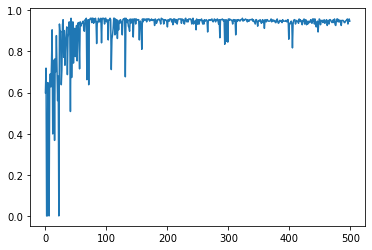

In [4]:
## Plot the total rewards gained at the end of each learning trial
## across all learning trials
plt.plot(ep_results[0])

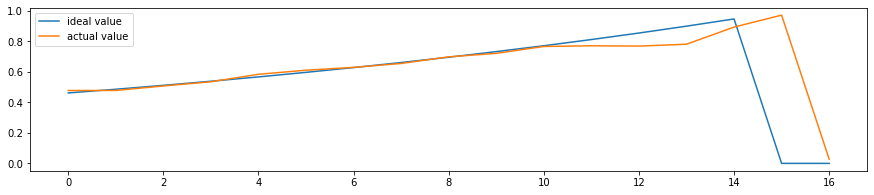

In [5]:
## Function for calulating the ideal value given the rewards recieved in the last trial
lst_rew=-1
def value(discount):
    d = discount**t
    return np.convolve(d[::-1], ep_rewards[0][lst_rew])[-len(t):]
T = len(ep_rewards[0][lst_rew])#[:-n])
t = np.arange(0, int(T))

## Plot ideal value against actual value in final run
plt.figure(figsize=(15, 3))
plt.plot(t, value(0.95), label='ideal value')
plt.plot(ep_values[0][lst_rew], label='actual value')
plt.legend()

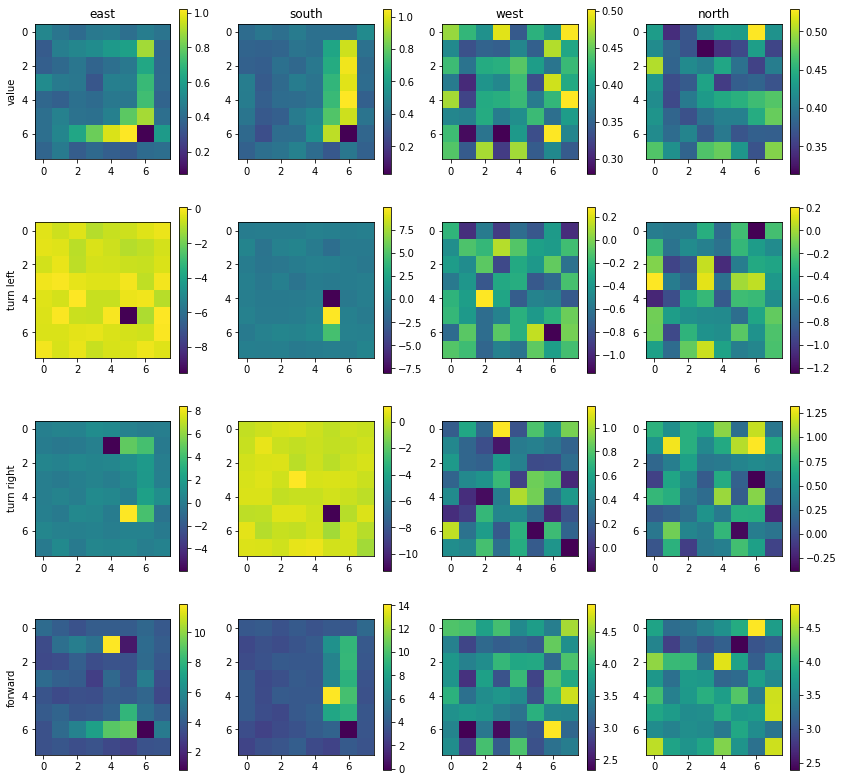

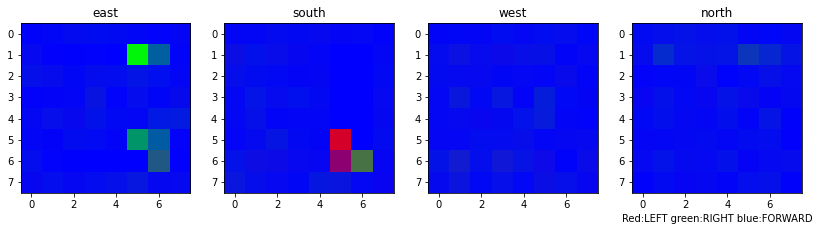

In [6]:
## Function for plotting the value of each state and the value of each action in each state
def plot_table(P):
    plt.figure(figsize=(14,14))
    for i in range(4):
        for j in range(4):
            plt.subplot(4, 4, i*4+j+1)
            plt.imshow(P[:,:,j,i])#, vmin=0, vmax=1)
            plt.colorbar()
            if j == 0:
                plt.ylabel(['value', 'turn left', 'turn right', 'forward'][i])
            if i == 0:
                plt.title(['east', 'south', 'west', 'north'][j])
    plt.show()

## Function for plotting the policy
def plot_policy(P):
    plt.figure(figsize=(14,3.5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        img = np.zeros((8,8,3))
        for x in range(8):
            for y in range(8):
                img[x,y,:] = softmax(P[x,y,i,1:])
        plt.imshow(img)
        plt.title(['east', 'south', 'west', 'north'][i])
    plt.xlabel('Red:LEFT green:RIGHT blue:FORWARD')
    plt.show()

## Plot state and action values   
plot_table(policy[0])
## Plot the policy
plot_policy(policy[0])
